In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from implementations import *

# Load the training data into feature matrix, class labels, and event ids:

In [14]:
import datetime
from proj1_helpers import *

DATA_TRAIN_PATH = 'data/train.csv' 
y, X, ids = load_csv_data(DATA_TRAIN_PATH)
X.shape

(250000, 30)

# Data preprocessing
## Missing Values

In [15]:
from missing_values import *
interpolator = LinearInterpolator()
X = interpolator.interpolate(X.copy())

## Outliers

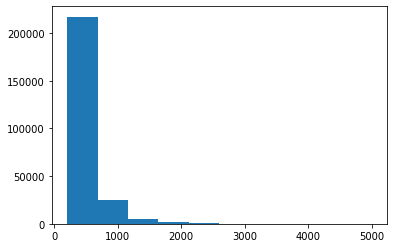

(250000,)
ditribution of the labels among the outliers :
737 -1s and 2556 1s ratio= 0.2883411580594679
Number of outliers removed :  3293


In [4]:
outlier_mask=np.linalg.norm(X,axis=1)<1500
plt.hist(np.linalg.norm(X,axis=1))
plt.show()
print(outlier_mask.shape)
# outliers removal
X = X[outlier_mask]
print('ditribution of the labels among the outliers :')
print(np.sum(y[~outlier_mask]==-1),'-1s and',np.sum(y[~outlier_mask]==1),'1s ratio=',np.sum(y[~outlier_mask]==-1)/np.sum(y[~outlier_mask]==1) )
y = y[outlier_mask]
print('Number of outliers removed : ', np.sum(~outlier_mask))

## Logistic Regression

In [16]:
def transform_y(y):
    y[y<0] = 0
    return y
def inv_transform_y(y):
    y[y==0] = -1
    return y
def logistic_error(y,X,w):
    sigm=sigmoid(X@w)
    pred = sigm > 0.5
    return np.mean(y!=pred)

In [13]:
y=np.array(transform_y(y))

array([ 1., -1., -1., ...,  1., -1., -1.])

### Simple hyper parameter optimisation

In [9]:
from cross_validation import hyper_parameter_optimisation
degrees = np.arange(3,10)
lambdas = np.logspace(-1, 2,2)
gammas = [1e-6] #np.logspace(-6, -5, 3)
params={'degree':degrees,'gamma':gammas,'lambda':lambdas,}
#call to the grid search function
best_param = hyper_parameter_optimisation(params,X,y)

Current iteration = 0, loss=29137.28482239975


KeyboardInterrupt: 

### K-fold

In [16]:
def stoch_grad_logit(y, tx, w):
    """
    Compute a stochastic gradient from just few examples 
    n and their corresponding y_n labels.
    """   
    by,bx = [b for b in batch_iter(y, tx, batch_size=4)][0]
    return gradient_logistic_regression(by, bx, w)
def stoch_logit(y,tx,initial_w,max_iters,gamma):
    """Logistic regression with gradient descent"""
    return gradient_descent(
        y, tx, initial_w,max_iters, gamma,
        loss_logistic_regression,
        stoch_grad_logit)

In [17]:
from cross_validation import grid_search_cv
degrees = np.arange(5,7)
lambdas = np.logspace(-1, 2,2)
gammas = [1e-6] #np.logspace(-6, -5, 3)
params={'degree':degrees,'gamma':gammas,'lambda':lambdas,}
#call to the grid search function
best_param = grid_search_cv(
    params,X,y,k_fold=20,
    model=lambda y_tr,x_tr,p: reg_logistic_regression(
        y_tr,x_tr, 
        lambda_=p['lambda'],
        initial_w=np.zeros((x_tr.shape[1])),
        max_iters=1000,
        gamma=p['gamma']),
    loss_ft=logistic_error)

****************
----------------
%%%%%%%%%%%%%%%%
Current iteration = 0, loss=173286.60430277284
****************
----------------
%%%%%%%%%%%%%%%%
****************
----------------
%%%%%%%%%%%%%%%%
****************
----------------
%%%%%%%%%%%%%%%%
****************
----------------
%%%%%%%%%%%%%%%%
****************
----------------
%%%%%%%%%%%%%%%%
****************
----------------
%%%%%%%%%%%%%%%%
****************
----------------
%%%%%%%%%%%%%%%%
****************
----------------
%%%%%%%%%%%%%%%%
****************
----------------
%%%%%%%%%%%%%%%%
****************


KeyboardInterrupt: 

# Cross Validation


In [18]:
from cross_validation import *

In [20]:
degrees = np.arange(1,9)
lambdas = np.logspace(-4, 2, 10)
params={'degree':degrees,'lambda':lambdas}
#call to the grid search function
best_param = grid_search_cv(params,X,y,k_fold=10)

Evaluated for {'degree': 1, 'lambda': 0.0001} : loss = 0.7628283770688195
Evaluated for {'degree': 1, 'lambda': 0.00046415888336127773} : loss = 0.7628286927732513
Evaluated for {'degree': 1, 'lambda': 0.002154434690031882} : loss = 0.7628287631461997
Evaluated for {'degree': 1, 'lambda': 0.01} : loss = 0.762828784582916
Evaluated for {'degree': 1, 'lambda': 0.046415888336127774} : loss = 0.7628288310779736
Evaluated for {'degree': 1, 'lambda': 0.21544346900318823} : loss = 0.7628289213731477
Evaluated for {'degree': 1, 'lambda': 1.0} : loss = 0.7628292018689985
Evaluated for {'degree': 1, 'lambda': 4.641588833612772} : loss = 0.7628332335134178
Evaluated for {'degree': 1, 'lambda': 21.54434690031882} : loss = 0.7628778517004712
Evaluated for {'degree': 1, 'lambda': 100.0} : loss = 0.7631817333213131
Evaluated for {'degree': 2, 'lambda': 0.0001} : loss = 0.760449951269683
Evaluated for {'degree': 2, 'lambda': 0.00046415888336127773} : loss = 0.7604504579779428
Evaluated for {'degree': 

## Train final model with the best parameters

In [6]:
from build_polynomial import PolynomialExpansion
best_param = {'degree':6,'lambda':0.001, 'gamma':1e-6}
degree  = best_param['degree']
lambda_ = best_param['lambda']
gamma=best_param['gamma']

expanser = PolynomialExpansion(degree,with_interractions=True)
tX       = expanser.expand(X)
weights,loss_tr  = reg_logistic_regression(
    y,tX,
    lambda_=lambda_,
    initial_w=np.zeros((tX.shape[1])),
    max_iters=2000,
    gamma=gamma)

Current iteration = 0, loss=16697.01930269706


KeyboardInterrupt: 

In [21]:
##### For ridge reg ###########
degree  = best_param['degree']
lambda_ = best_param['lambda']
expanser = PolynomialExpansion(
    degree,with_interractions=True,with_scaler=True)
tX       = expanser.expand(X)
weights,loss_tr = ridge_regression(y,tX,lambda_)

# Model evaluation

In [52]:
print('logistic acc:' ,logistic_accuracy(y,tX,weights))

logistic acc: 0.2259157624226309


In [22]:
def evaluate_model(x,y,w, print_=False):
    pred=predict_labels(w, x)
    false_positive=np.sum(pred>y)
    false_negative=np.sum(pred<y)
    true_positive=np.sum((pred==y) * (y==np.ones(len(y))*1))
    true_negative=np.sum((pred==y) * (y==np.ones(len(y))*-1))
    confusion_matrix=[[true_positive,false_positive],[false_negative,true_negative]]
    if print_:
        print("==============================")
        print('precision=',true_positive/(true_positive+false_positive))
        print('accuracy=',(true_positive+true_negative)/len(pred))
        print('recall=',true_positive/(true_positive+false_negative))
        print('f1=',true_positive/(true_positive+0.5*(false_negative+false_positive)))
        print("confusion matrix:")
        print(confusion_matrix[0])
        print(confusion_matrix[1])
        print("==============================")   
    
    return (true_positive+true_negative)/len(pred)

In [23]:
evaluate_model(tX,y,weights, print_=True)

precision= 0.7587570915525946
accuracy= 0.81642
recall= 0.6806821763339442
f1= 0.7176022495831257
confusion matrix:
[58312, 18540]
[27355, 145793]


0.81642

# Generate predictions and save ouput in csv format for submission:

In [17]:
DATA_TEST_PATH = 'data/test.csv' 
y_sub, X_sub, ids_sub = load_csv_data(DATA_TEST_PATH)
X_sub.shape

(568238, 30)

## Apply same transformation pipeline

In [18]:
Xt_sub = interpolator.interpolate(X_sub)
Xt_sub = expanser.expand(Xt_sub)

## Prediction 

### Least squares

In [19]:
y_pred = predict_labels(weights, Xt_sub)
np.sum(y_pred)/len(y_pred)

-0.3875172022990367

### Logistic regression

In [44]:
def logistic_predictor(X,w):
    sigm=sigmoid(X@w)
    pred = [ -1 if x<0.5 else 1 for x in sigm]
    return pred

In [12]:
#y_pred = predict_labels(weights, Xt_sub)
y_pred=logistic_predictor( Xt_sub,weights)
np.sum(y_pred)/len(y_pred)

[autoreload of missing_values failed: Traceback (most recent call last):
  File "/Users/lucas/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/lucas/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/Users/lucas/anaconda3/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Users/lucas/anaconda3/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/Users/lucas/Desktop

NameError: name 'logistic_predictor' is not defined

## Save output for submission 

In [21]:
OUTPUT_PATH = 'data/submission.csv' # TODO: fill in desired name of output file for submission

create_csv_submission(ids_sub, y_pred, OUTPUT_PATH)